<a href="https://colab.research.google.com/github/Material-Educativo/Tecnicas-heuristicas/blob/main/PSO_vs_Alpine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Función Alpine
Empecemos viendo la regla de correspondencia y gráfica de la función Alpine.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import math
import matplotlib.animation as animation
from IPython.display import Video  # Para mostrar el video en Colab

In [21]:
def rastrigin(x, y):
    return 20 + x**2 - 10 * np.cos(2 * np.pi * x) + y**2 - 10 * np.cos(2 * np.pi * y)

In [22]:
def alpine(x, y):
    return np.abs(x * np.sin(x) + 0.1 * x) + np.abs(y * np.sin(y) + 0.1 * y)

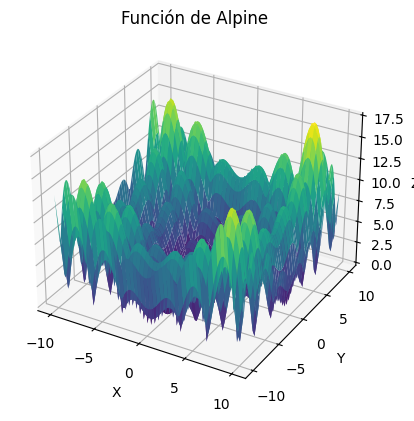

In [23]:
# Crear una malla de puntos para graficar la función
x = np.linspace(-10.0, 10.0, 100)
y = np.linspace(-10.0, 10.0, 100)
X, Y = np.meshgrid(x, y)
Z = alpine(X, Y)

# Crear una figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie de la función
ax.plot_surface(X, Y, Z, cmap='viridis')

# Etiquetas de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Título
plt.title('Función de Alpine')

# Mostrar la figura
plt.show()


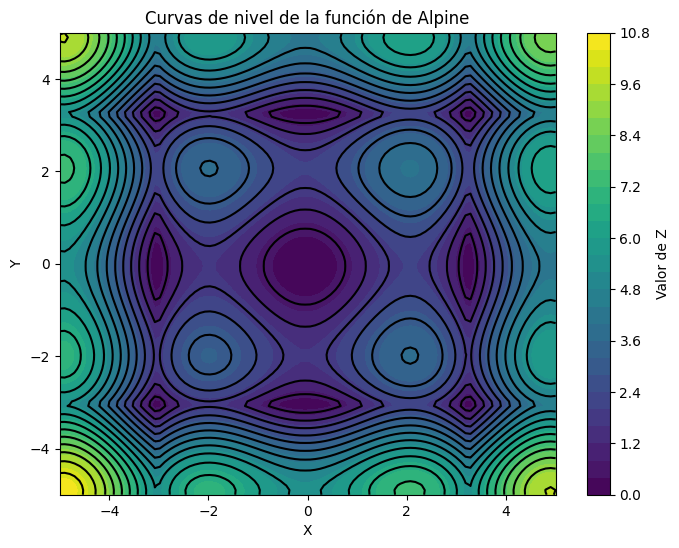

In [24]:
# Crear una malla de puntos para graficar las curvas de nivel
x = np.linspace(-5.0, 5.0, 100)
y = np.linspace(-5.0, 5.0, 100)
X, Y = np.meshgrid(x, y)
Z = alpine(X, Y)

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))  # Ajusta el tamaño aquí (ancho, alto)

# Graficar las curvas de nivel con un degradado continuo
contour = plt.contourf(X, Y, Z, levels=30, cmap='viridis')  # levels ajusta la cantidad de curvas de nivel

# Graficar las curvas de nivel con líneas negras para resaltarlas
plt.contour(X, Y, Z, levels=20, colors='black')  # levels ajusta la cantidad de curvas de nivel

# Etiquetas de los ejes
plt.xlabel('X')
plt.ylabel('Y')

# Título
plt.title('Curvas de nivel de la función de Alpine')

# Agregar la barra de color para el valor Z
plt.colorbar(contour, label='Valor de Z')

# Mostrar la gráfica
plt.show()


# Optimización por enjambre de partículas (PSO)
Veamos el comportamiento de PSO con la función alpine.

In [25]:
def pso(max_iter, n_particulas, w, c1, c2):
    # Inicializar partículas en posiciones aleatorias dentro del rango
    rango_x=(-5, 5)
    rango_y=(-5, 5)
    particulas = [(random.uniform(rango_x[0], rango_x[1]), random.uniform(rango_y[0], rango_y[1])) for _ in range(n_particulas)]
    velocidades = [(random.uniform(-1, 1), random.uniform(-1, 1)) for _ in range(n_particulas)]

    # Evaluar la función objetivo en cada partícula
    valores = [alpine(x, y) for x, y in particulas]

    # Mejor posición personal de cada partícula (pbest) y la mejor global (gbest)
    pbest = particulas[:]
    pbest_valores = valores[:]
    gbest = particulas[np.argmin(valores)]
    gbest_valor = min(valores)

    # Guardar las coordenadas iniciales
    # para graficar el comportamiento del algoritmo
    historial_valores = [gbest_valor]
    coordenadas_x = [np.array([part[0] for part in particulas])]
    coordenadas_y = [np.array([part[1] for part in particulas])]

    for iteracion in range(max_iter):
        for i in range(n_particulas):
            # Obtener velocidad y posición de la partícula i
            x, y = particulas[i]
            vx, vy = velocidades[i]
            valor_actual = valores[i]

            # Actualizar velocidad
            r1, r2 = random.random(), random.random()
            vx = w * vx + c1 * r1 * (pbest[i][0] - x) + c2 * r2 * (gbest[0] - x)
            vy = w * vy + c1 * r1 * (pbest[i][1] - y) + c2 * r2 * (gbest[1] - y)

            # Actualizar posición
            x = x + vx
            y = y + vy

            # Asegurar que las posiciones no salgan del rango
            x = np.clip(x, rango_x[0], rango_x[1])
            y = np.clip(y, rango_y[0], rango_y[1])

            particulas[i] = (x, y)
            velocidades[i] = (vx, vy)

            # Evaluar la función objetivo
            valor = alpine(x, y)
            valores[i] = valor

            # Actualizar pbest
            if valor < pbest_valores[i]:
                pbest[i] = (x, y)
                pbest_valores[i] = valor

            # Actualizar gbest
            if valor < gbest_valor:
                gbest = (x, y)
                gbest_valor = valor

        # Guardar el historial de la mejor solución encontrada
        historial_valores.append(gbest_valor)

        # Guardar las coordenadas de las partículas
        # para graficar el comportamiento del algoritmo
        coordenadas_x.append(np.array([part[0] for part in particulas]))
        coordenadas_y.append(np.array([part[1] for part in particulas]))

    return gbest[0], gbest[1], gbest_valor, historial_valores, coordenadas_x, coordenadas_y

In [26]:
# Parámetros del algoritmo
max_iter = 50  # Número máximo de iteraciones
n_particulas = 10  # Número de partículas
w=0.75 # Ponderador para la inercia
c1=0.50 # Ponderador para la influencia personal
c2=0.50 # Ponderador para la influencia social

# Ejecutar el algoritmo PSO
x, y, valor, valores, coor_x, coor_y = pso(max_iter, n_particulas, w, c1, c2)

print("Mejor solución encontrada:")
print("X:", x)
print("Y:", y)
print("Valor de Alpine:", valor)

Mejor solución encontrada:
X: -0.09989055067390985
Y: -3.041430441016329
Valor de Alpine: 4.328065252175162e-05


# Veamos la ubicación de la mejor solución
Dado que en PSO se emplean múltiples soluciones simultáneamente, resulta complicado representar su movimiento en una sola imagen. Por lo tanto, se mostrará únicamente la posición de la mejor solución conocida por el enjambre a medida que avanza el algoritmo.

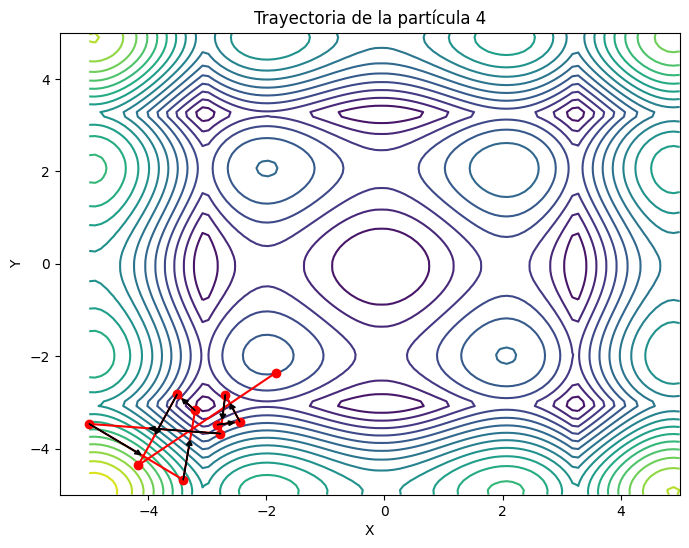

In [27]:
# Crear una malla de puntos para graficar las curvas de nivel
x = np.linspace(-5.0, 5.0, 100)
y = np.linspace(-5.0, 5.0, 100)
X, Y = np.meshgrid(x, y)
Z = alpine(X, Y)

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))  # Ajusta el tamaño aquí (ancho, alto)

# Graficar las curvas de nivel con líneas negras para resaltarlas
plt.contour(X, Y, Z, levels=20)  # levels ajusta la cantidad de curvas de nivel

## Partícula elegida
particula = 4

## Graficar la trayectoria del primer elemento (posición 0)
plt.plot(coor_x[particula], coor_y[particula], color='red', marker='o', linestyle='-')

# Agregar flechas para indicar la dirección del movimiento
for i in range(1, len(coor_x[particula]) - 1):  # Usamos x_coor[particula] y y_coor[particula] para la partícula elegida
    plt.arrow(coor_x[particula][i-1], coor_y[particula][i-1], (coor_x[particula][i] - coor_x[particula][i-1]) * 0.5,
              (coor_y[particula][i] - coor_y[particula][i-1]) * 0.5, color='black', head_width=0.1,
              head_length=0.1, zorder=10)

# Etiquetas de los ejes
plt.xlabel('X')
plt.ylabel('Y')

# Título
plt.title(f'Trayectoria de la partícula {particula}')

# Mostrar la gráfica
plt.show()

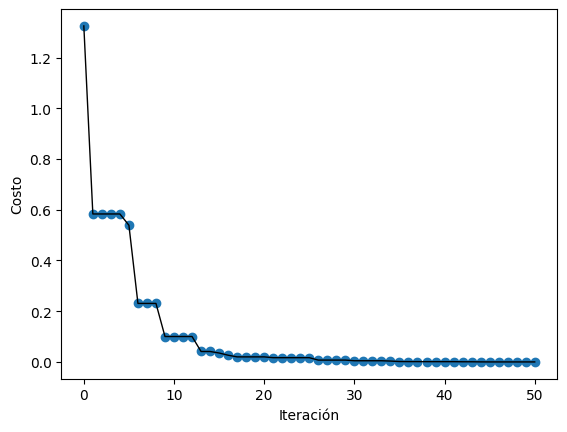

In [28]:
# La posición en la lista como valores "x"
valores_x = list(range(len(valores)))

# Conectar los puntos consecutivos con una línea negra
plt.plot(valores_x, valores, color='black', linestyle='-', linewidth=1, label='Línea')

# Crear la gráfica de dispersión
plt.scatter(valores_x, valores)

# Agregar etiquetas a los ejes
plt.xlabel("Iteración")
plt.ylabel("Costo")

# Mostrar la gráfica
plt.show()

#Veamos una animación

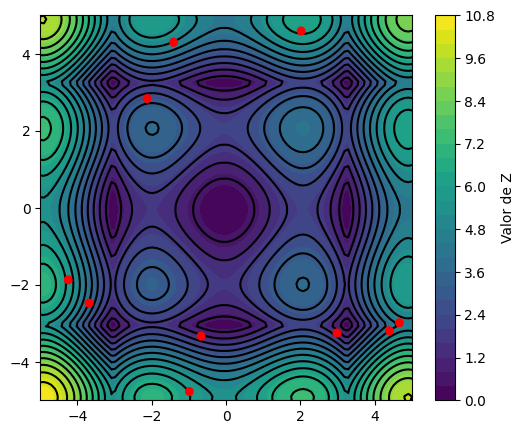

In [29]:
# Crear la malla de puntos para las curvas de nivel
x = np.linspace(-5.0, 5.0, 100)
y = np.linspace(-5.0, 5.0, 100)
X, Y = np.meshgrid(x, y)
Z = alpine(X, Y)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(6, 5))

# Graficar las curvas de nivel con un degradado continuo
contour = ax.contourf(X, Y, Z, levels=30, cmap='viridis')  # niveles ajusta la cantidad de curvas de nivel
ax.contour(X, Y, Z, levels=20, colors='black')  # curvas de nivel con líneas negras

# Agregar la barra de color
plt.colorbar(contour, ax=ax, label='Valor de Z')


# Inicializar los círculos (color rojo para todos)
circles = [plt.Circle((coor_x[0][i], coor_y[0][i]), 0.1, color='red', zorder=5) for i in range(10)]
for circle in circles:
    ax.add_artist(circle)

# Función de actualización para la animación
def update(frame):
    # Actualizar las posiciones de los círculos (todos los círculos son rojos)
    for i, circle in enumerate(circles):
        circle.set_center((coor_x[frame][i], coor_y[frame][i]))  # Actualizar la posición de cada círculo
        # Los círculos son rojos, por lo tanto no cambiamos su color
        #circle.set_facecolor('red')  # Mantener el color rojo
    return circles

# Crear la animación
ani = animation.FuncAnimation(fig, update, frames=len(coor_x), interval=50, blit=False)

# Guardar la animación como archivo MP4
ani.save('animacion.mp4', writer='ffmpeg', fps=1)

# Mostrar el video dentro de Google Colab
Video('animacion.mp4', embed=True)